Importing the necessary libraries.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

Exploring our data.

In [53]:
df = pd.read_csv("rock_density.csv")

In [54]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [56]:
df.describe()

,Rebound Signal Strength nHz,Rock Density kg/m3
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


In [57]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

<AxesSubplot:xlabel='Signal', ylabel='Density'>

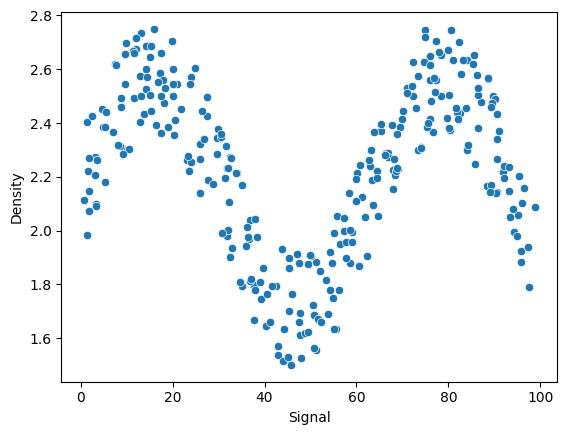

In [58]:
df.columns = ["Signal", "Density"]
sns.scatterplot(x="Signal", y="Density", data=df)

Applying machine learning to our data with various regressors.

In [59]:
X = df["Signal"].values.reshape(-1, 1)
y = df["Density"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [61]:
lr_model = LinearRegression()

In [62]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [63]:
lr_preds = lr_model.predict(X_test)

In [64]:
lr_preds

array([2.21881855, 2.20065352, 2.21472324, 2.21799439, 2.20901592,
       2.21894912, 2.22381933, 2.21787738, 2.20368222, 2.2034435 ,
       2.22610239, 2.2004913 , 2.23485715, 2.24374317, 2.22322118,
       2.2158634 , 2.20285925, 2.22864354, 2.21659998, 2.23722892,
       2.20802066, 2.24431374, 2.20739768, 2.20614465, 2.19981917,
       2.23643331, 2.19917144, 2.25415309, 2.2100169 , 2.20405209])

In [65]:
mean_absolute_error(y_test, lr_preds)

0.24102551432457792

In [66]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.29635030529174805

In [67]:
signal_range = np.arange(0, 100)

In [68]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [69]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

In [70]:
signal_preds

array([2.25455042, 2.25398299, 2.25341557, 2.25284815, 2.25228073,
       2.25171331, 2.25114589, 2.25057846, 2.25001104, 2.24944362,
       2.2488762 , 2.24830878, 2.24774136, 2.24717394, 2.24660651,
       2.24603909, 2.24547167, 2.24490425, 2.24433683, 2.24376941,
       2.24320198, 2.24263456, 2.24206714, 2.24149972, 2.2409323 ,
       2.24036488, 2.23979745, 2.23923003, 2.23866261, 2.23809519,
       2.23752777, 2.23696035, 2.23639293, 2.2358255 , 2.23525808,
       2.23469066, 2.23412324, 2.23355582, 2.2329884 , 2.23242097,
       2.23185355, 2.23128613, 2.23071871, 2.23015129, 2.22958387,
       2.22901644, 2.22844902, 2.2278816 , 2.22731418, 2.22674676,
       2.22617934, 2.22561192, 2.22504449, 2.22447707, 2.22390965,
       2.22334223, 2.22277481, 2.22220739, 2.22163996, 2.22107254,
       2.22050512, 2.2199377 , 2.21937028, 2.21880286, 2.21823544,
       2.21766801, 2.21710059, 2.21653317, 2.21596575, 2.21539833,
       2.21483091, 2.21426348, 2.21369606, 2.21312864, 2.21256

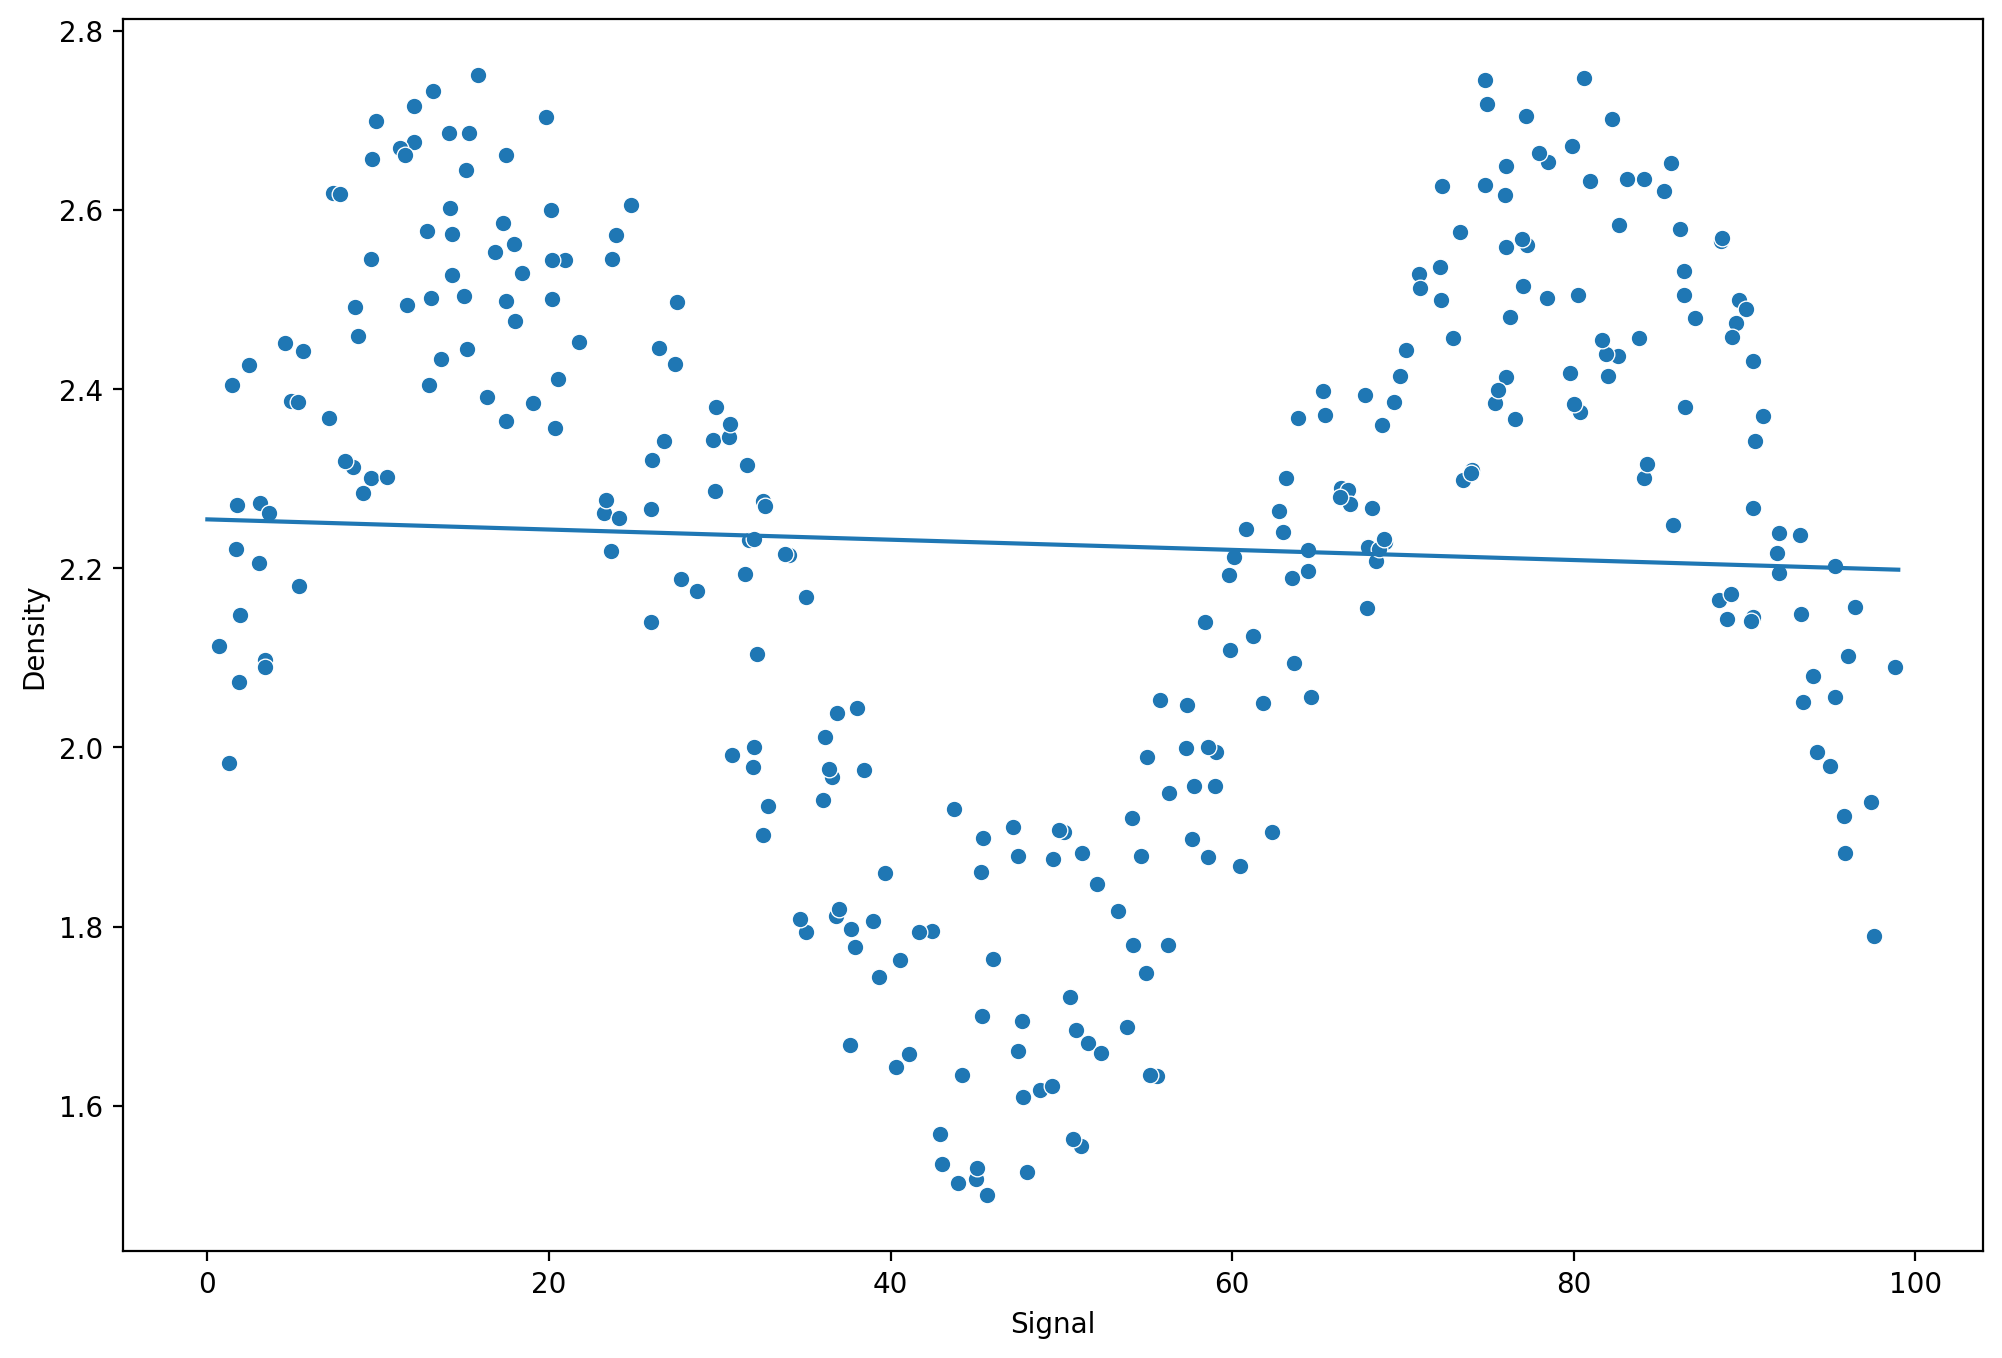

In [71]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x="Signal", y="Density", data=df)
plt.plot(signal_range, signal_preds)

Defining a function to make everything easier for us.

In [72]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")

    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(x="Signal", y="Density", data=df, color="black")

    plt.plot(signal_range, signal_preds)

MAE: 0.26037986749153247
RMSE: 0.3111531669863598


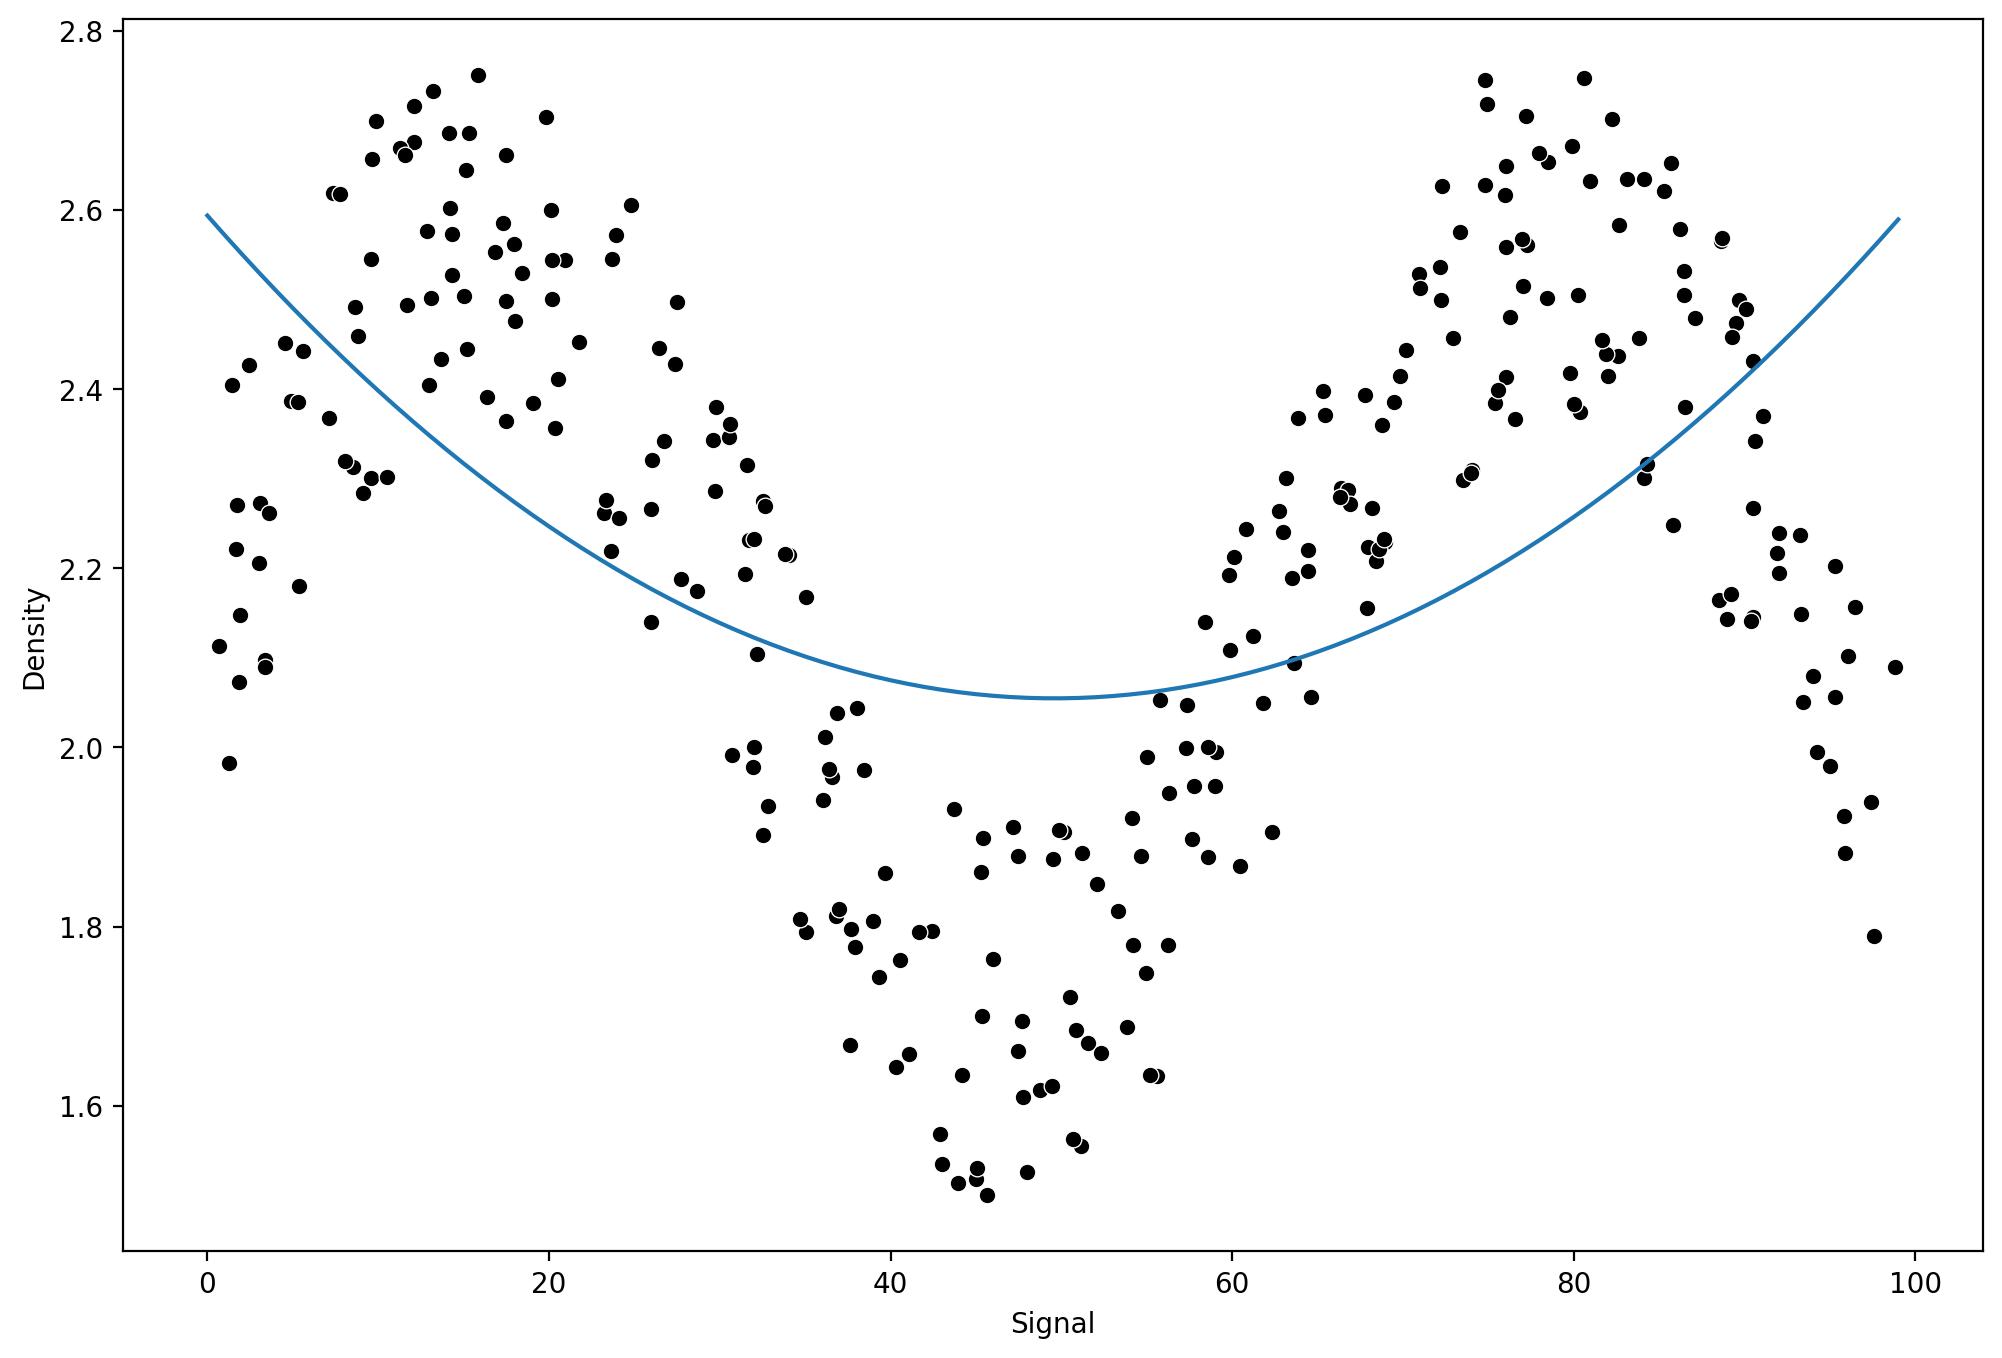

In [73]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
run_model(pipe, X_train, X_test, y_train, y_test)

MAE: 0.24023403393938553
RMSE: 0.2880825915192472


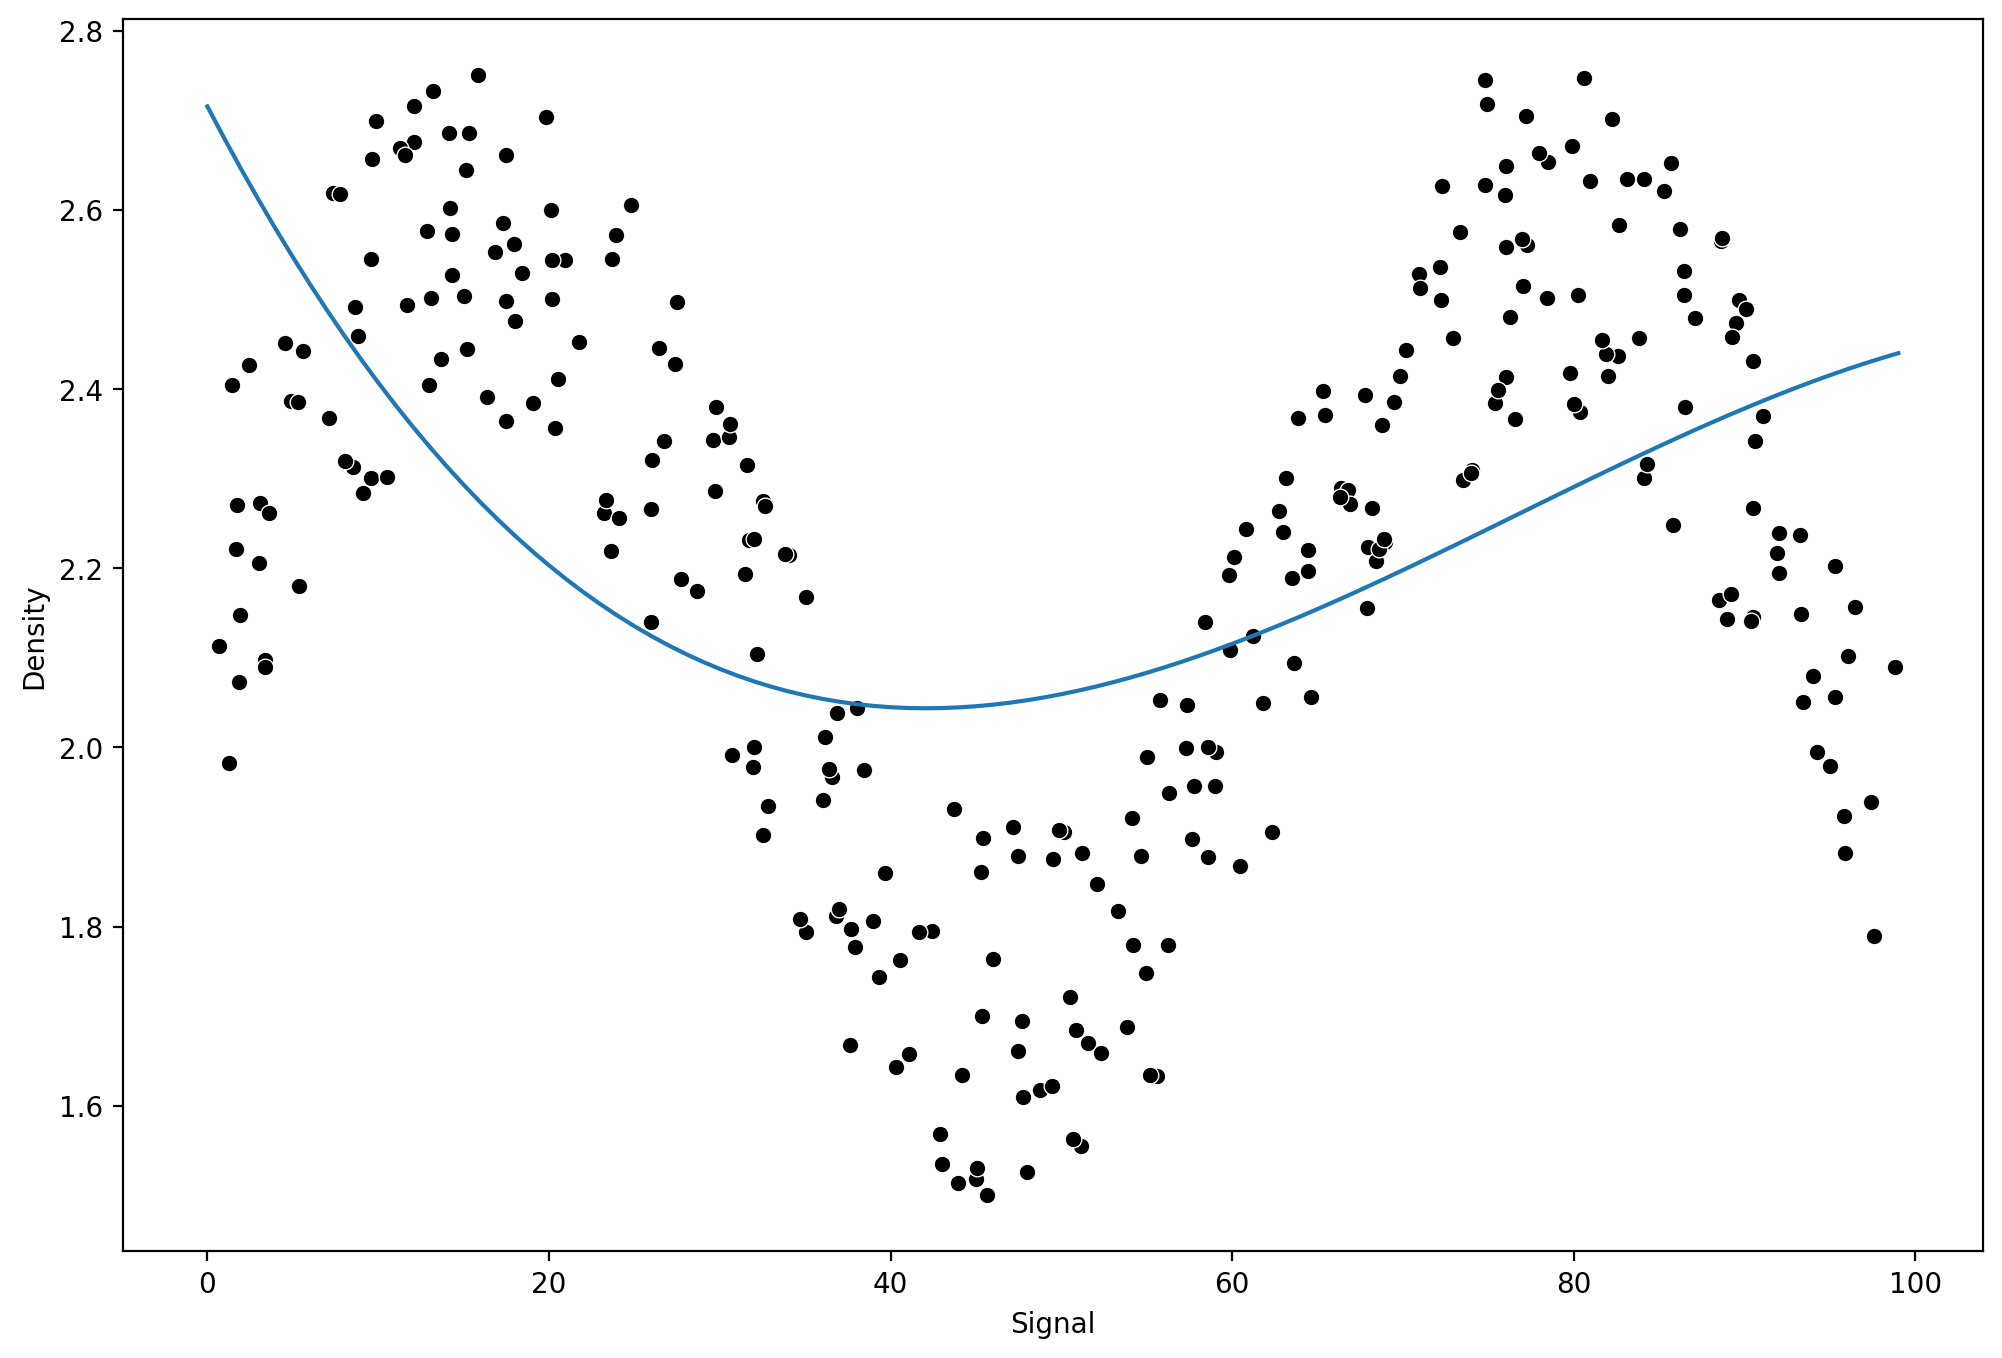

In [74]:
pipe = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
run_model(pipe, X_train, X_test, y_train, y_test)

MAE: 0.12880059802875513
RMSE: 0.14601667289734535


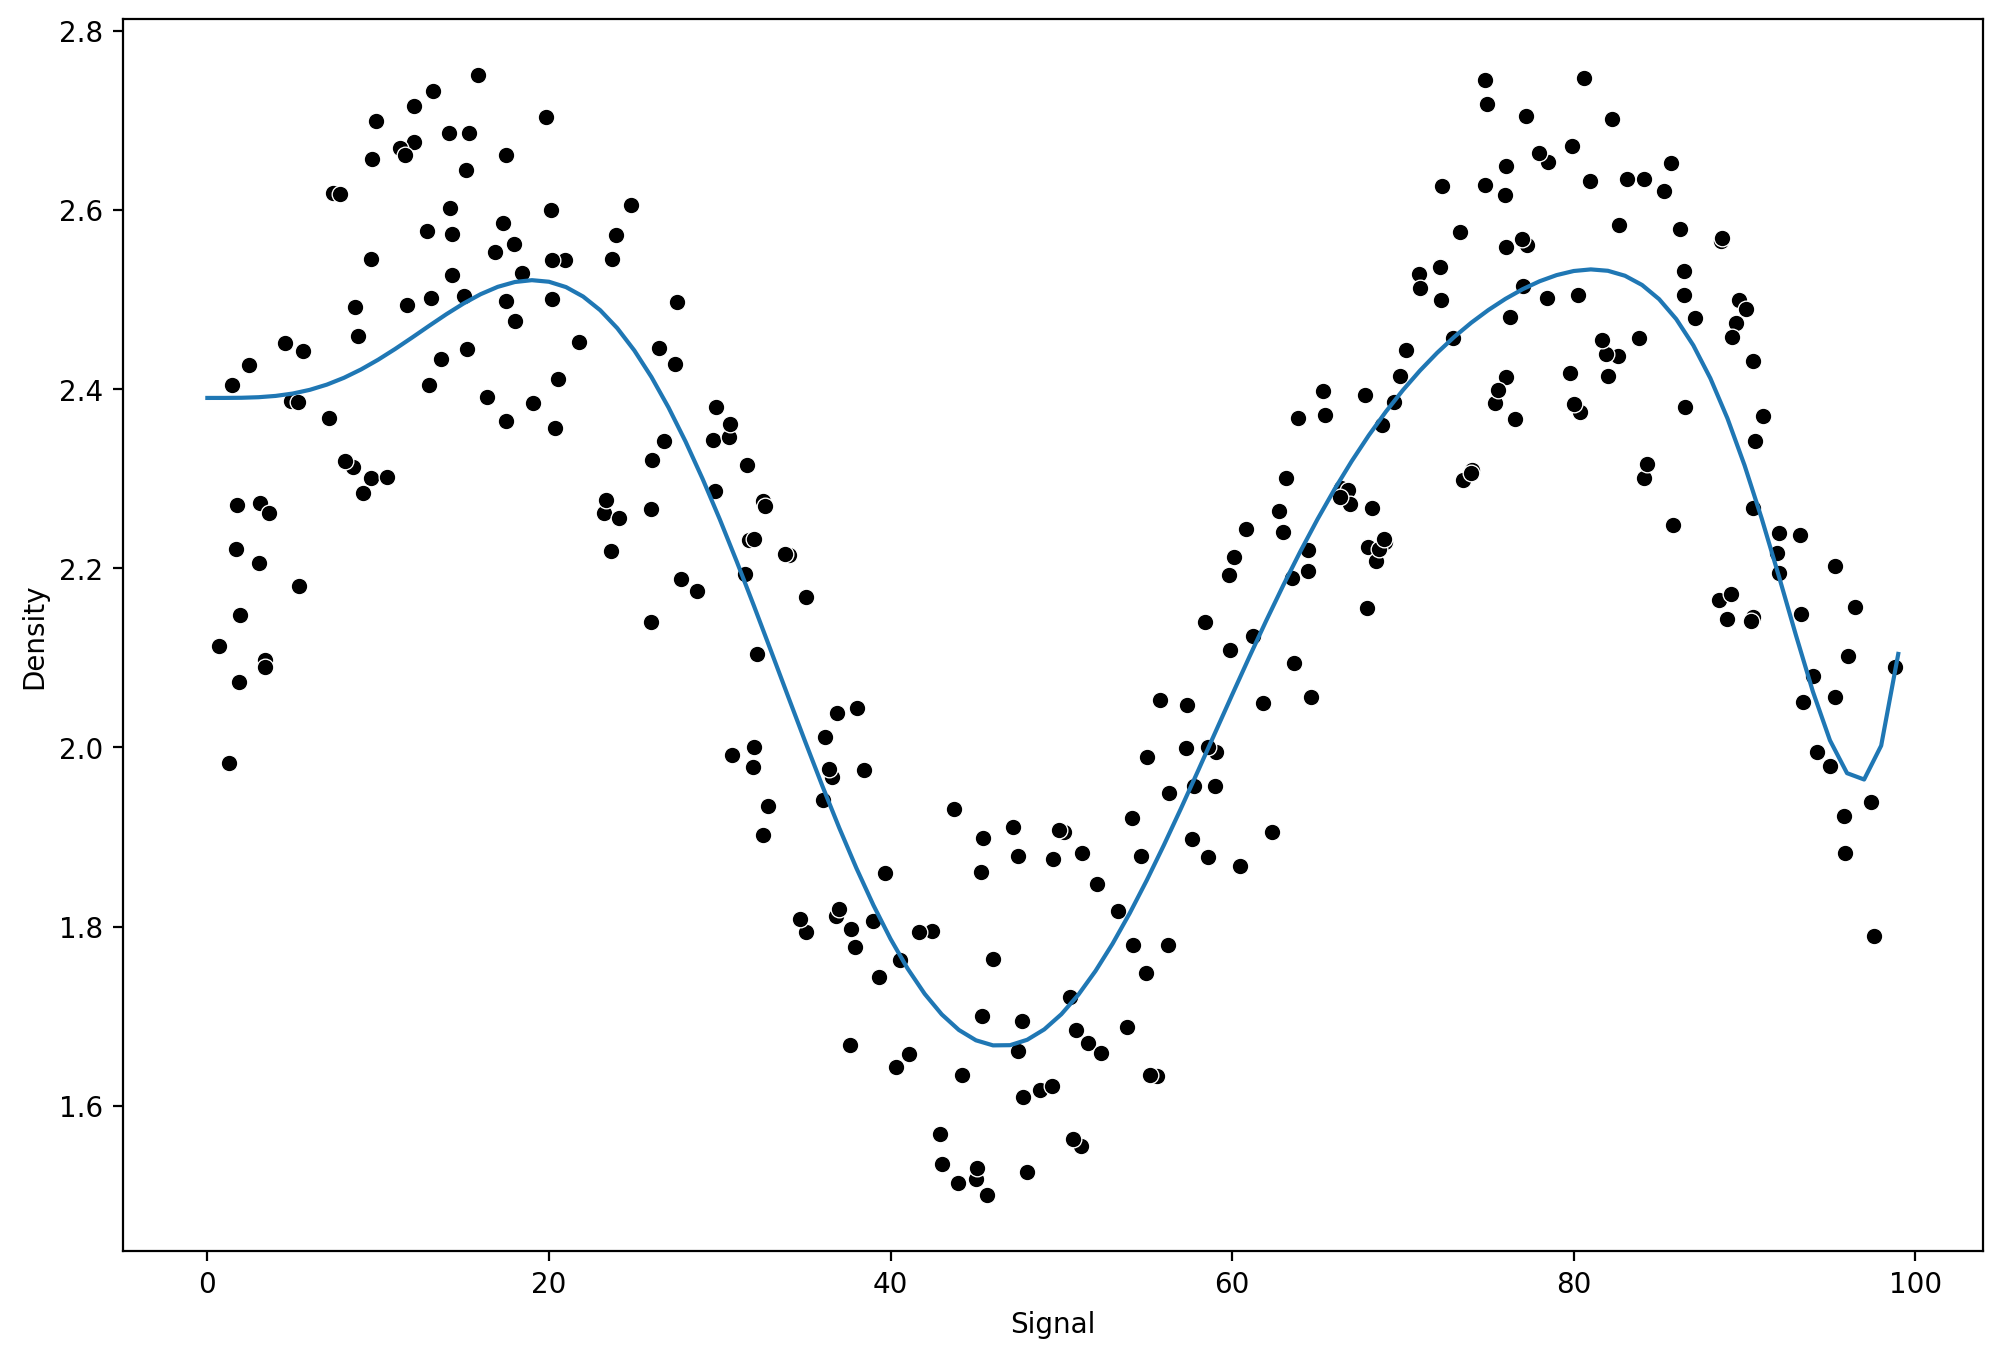

In [75]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
run_model(pipe, X_train, X_test, y_train, y_test)

MAE: 0.1206619084399996
RMSE: 0.16707571608725927
MAE: 0.13010617319422033
RMSE: 0.15404174541671728
MAE: 0.12000896423683943
RMSE: 0.1389085595310869


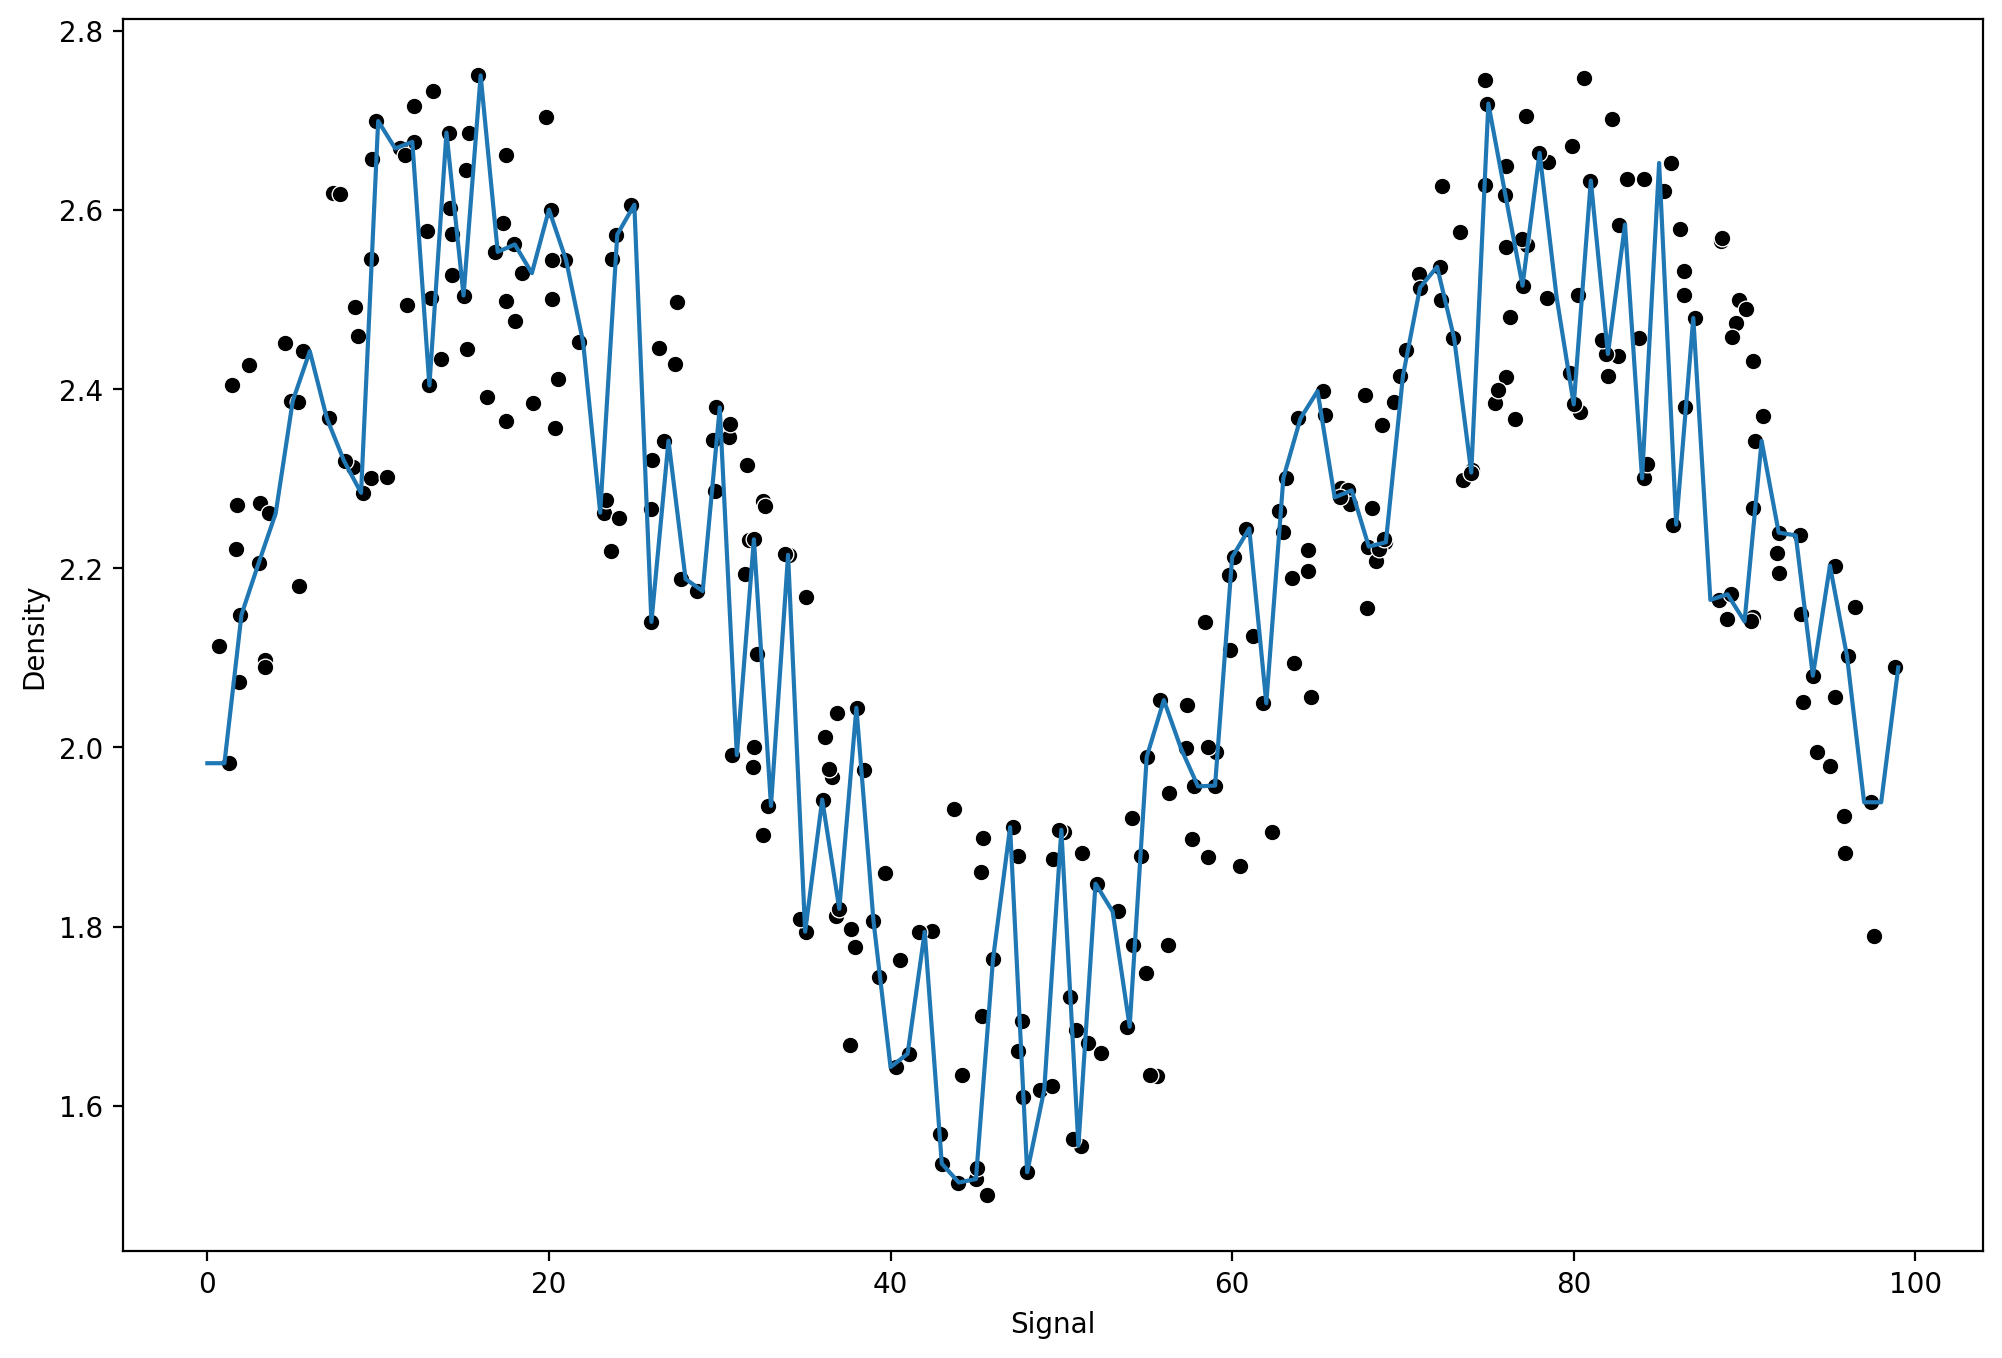

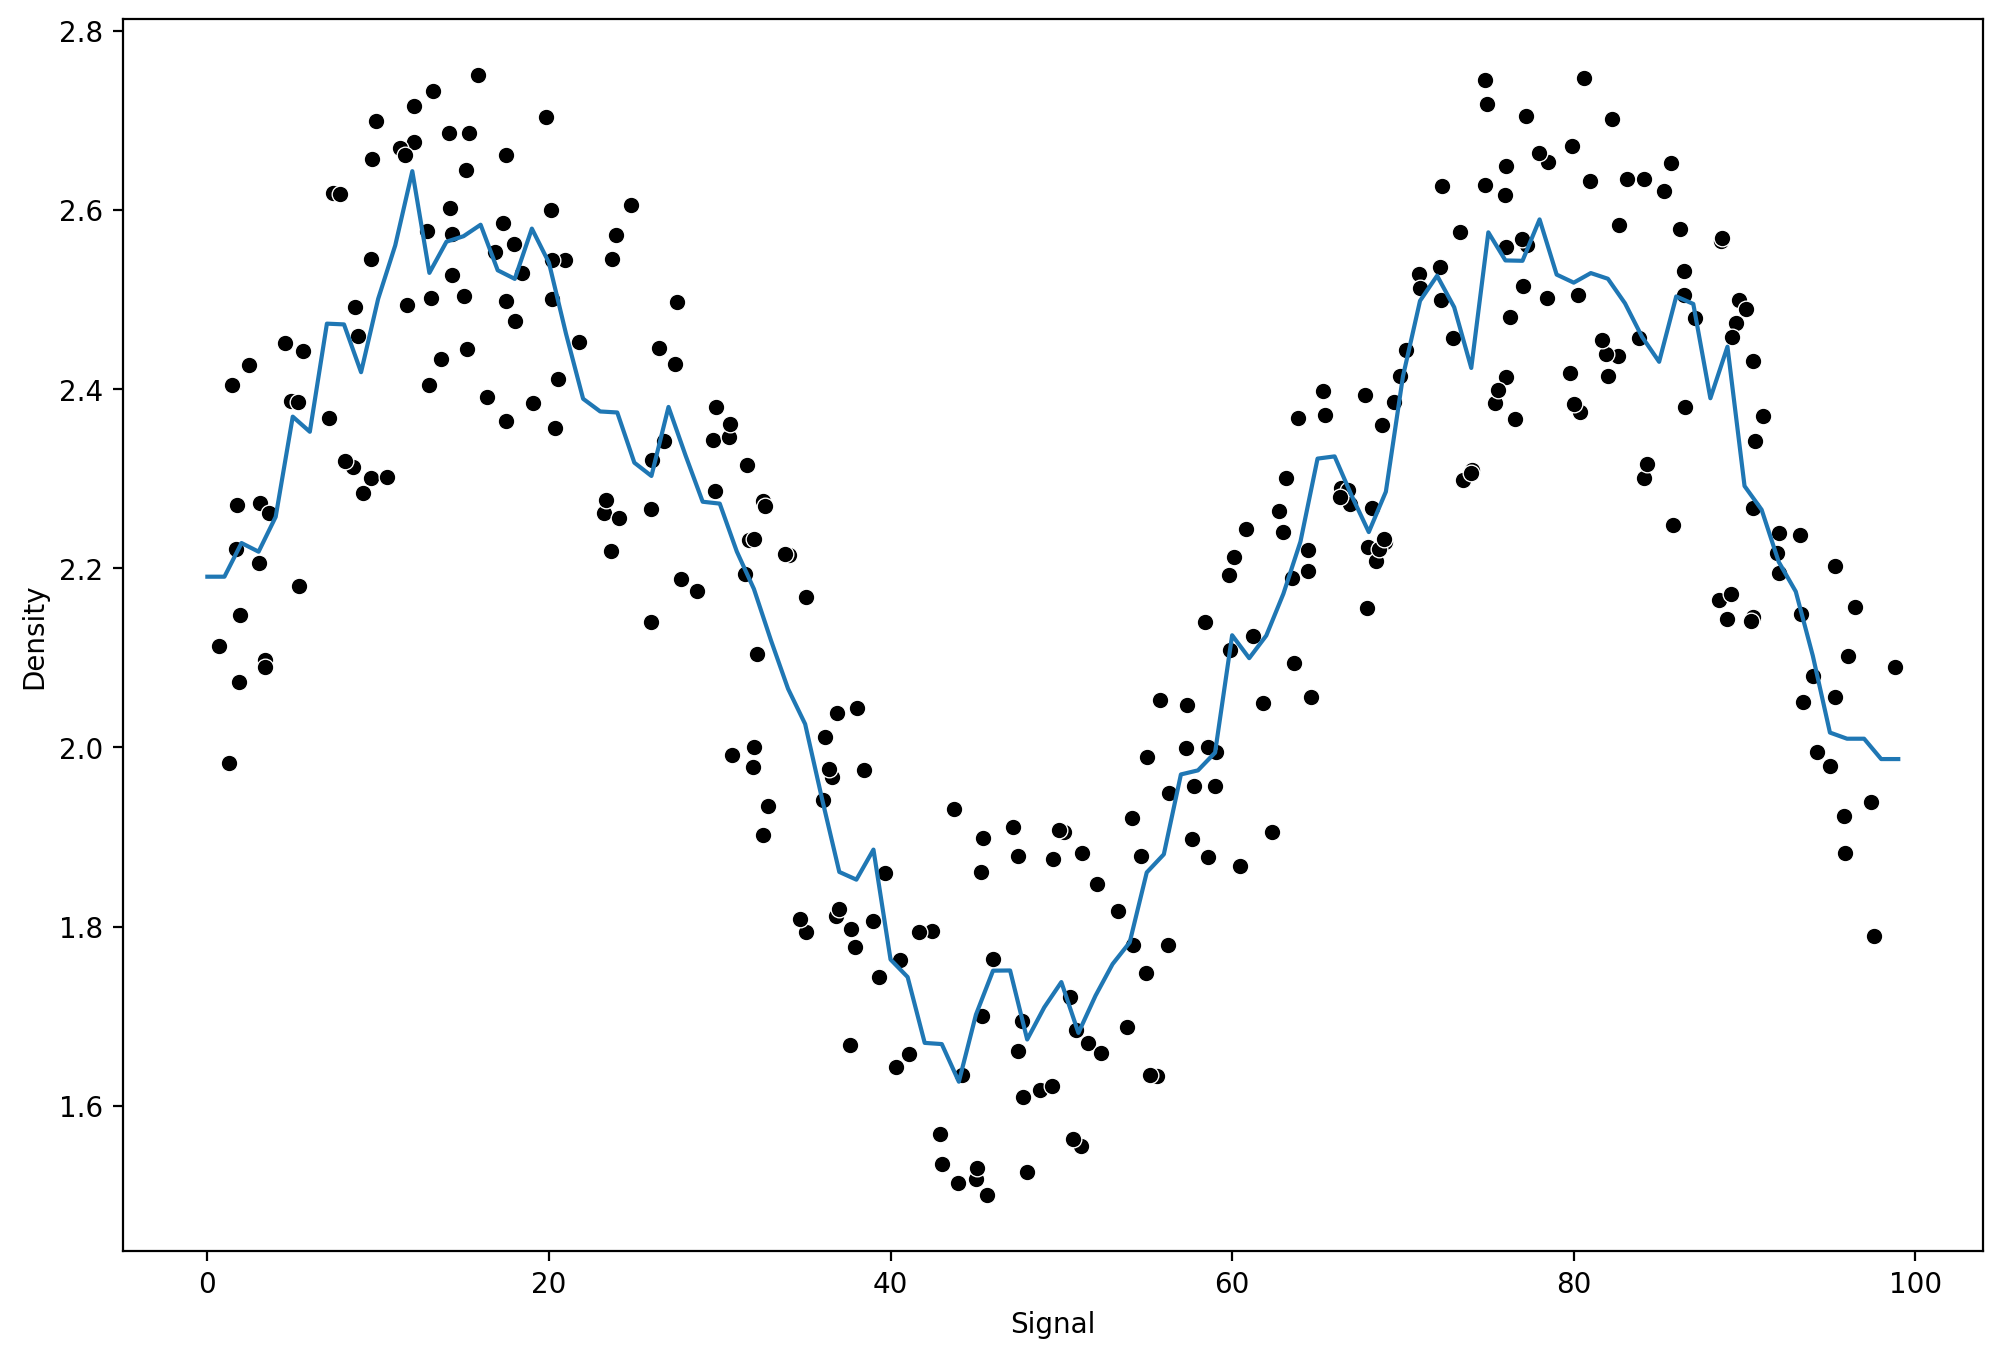

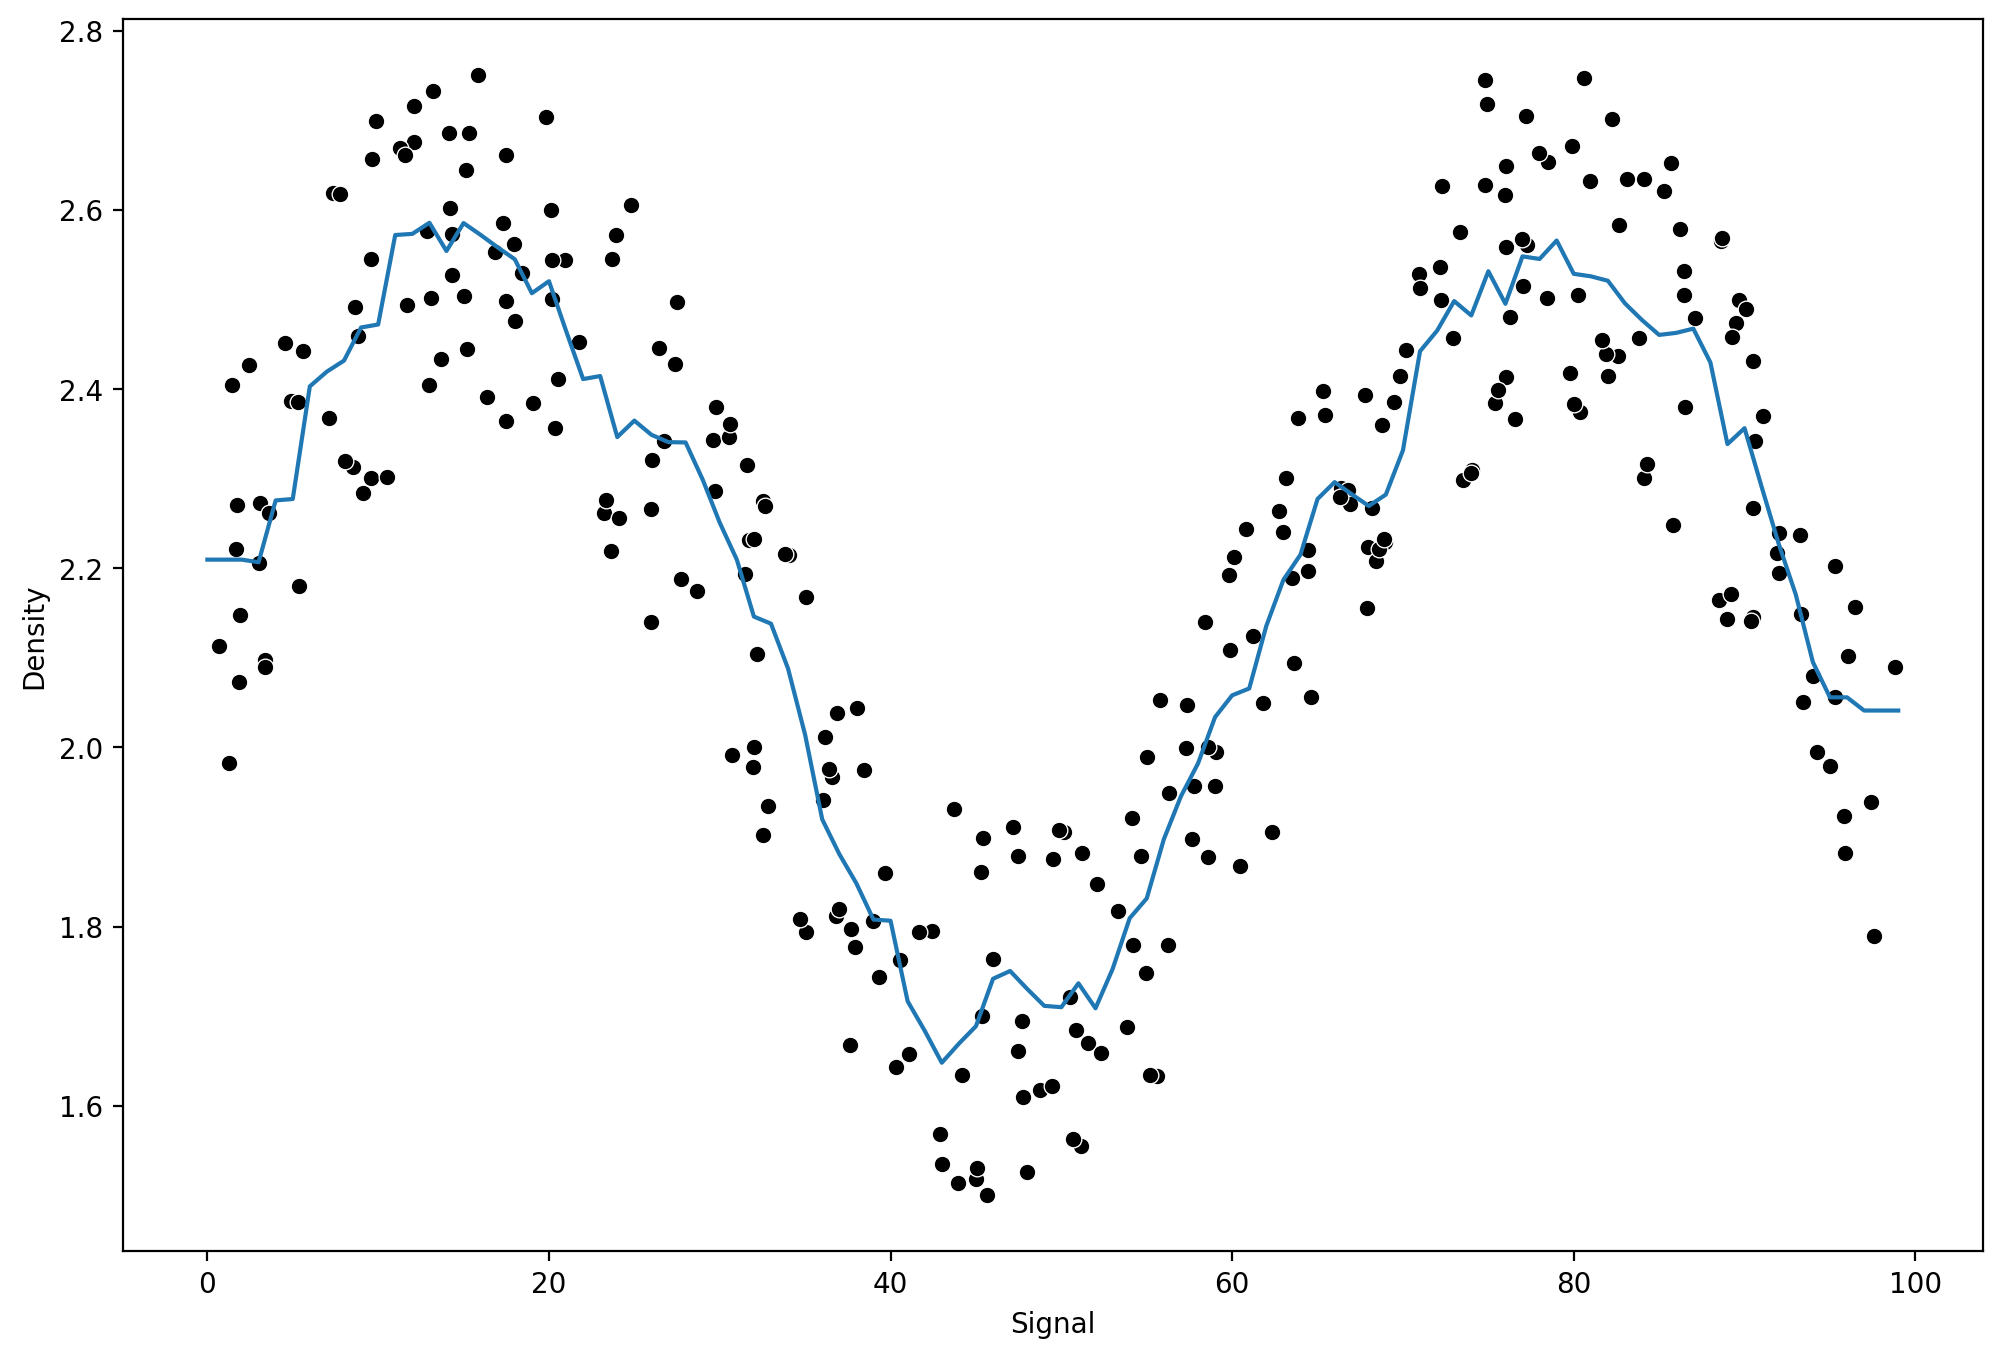

In [76]:
k_values = [1, 5, 10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, X_test, y_train, y_test)

MAE: 0.1206619084399996
RMSE: 0.16707571608725927


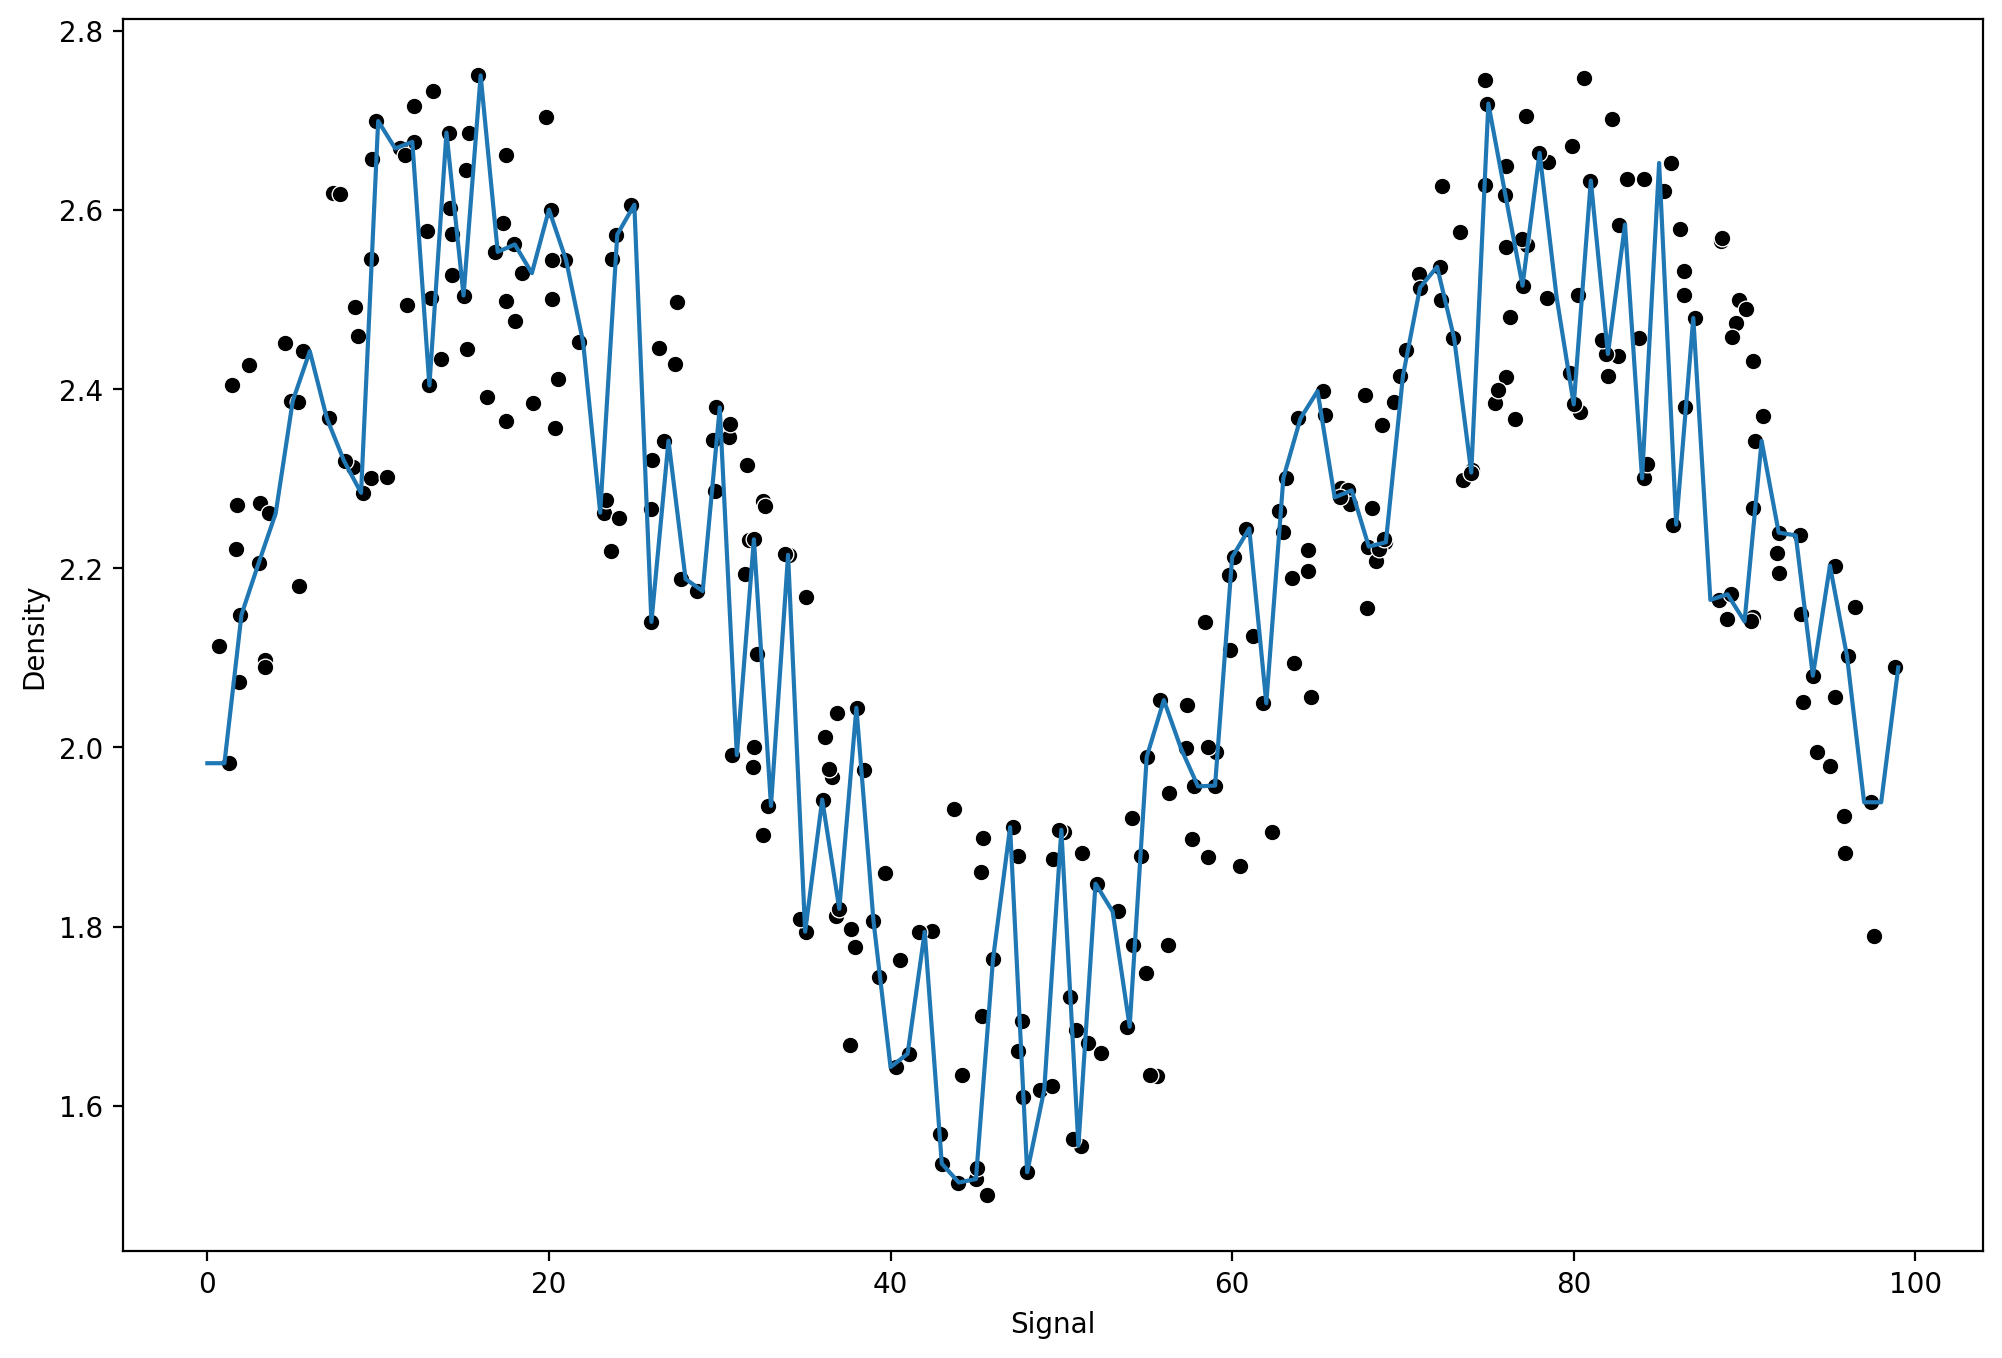

In [77]:
model = DecisionTreeRegressor()
run_model(model, X_train, X_test, y_train, y_test)

MAE: 0.12672177161621226
RMSE: 0.141542431349303


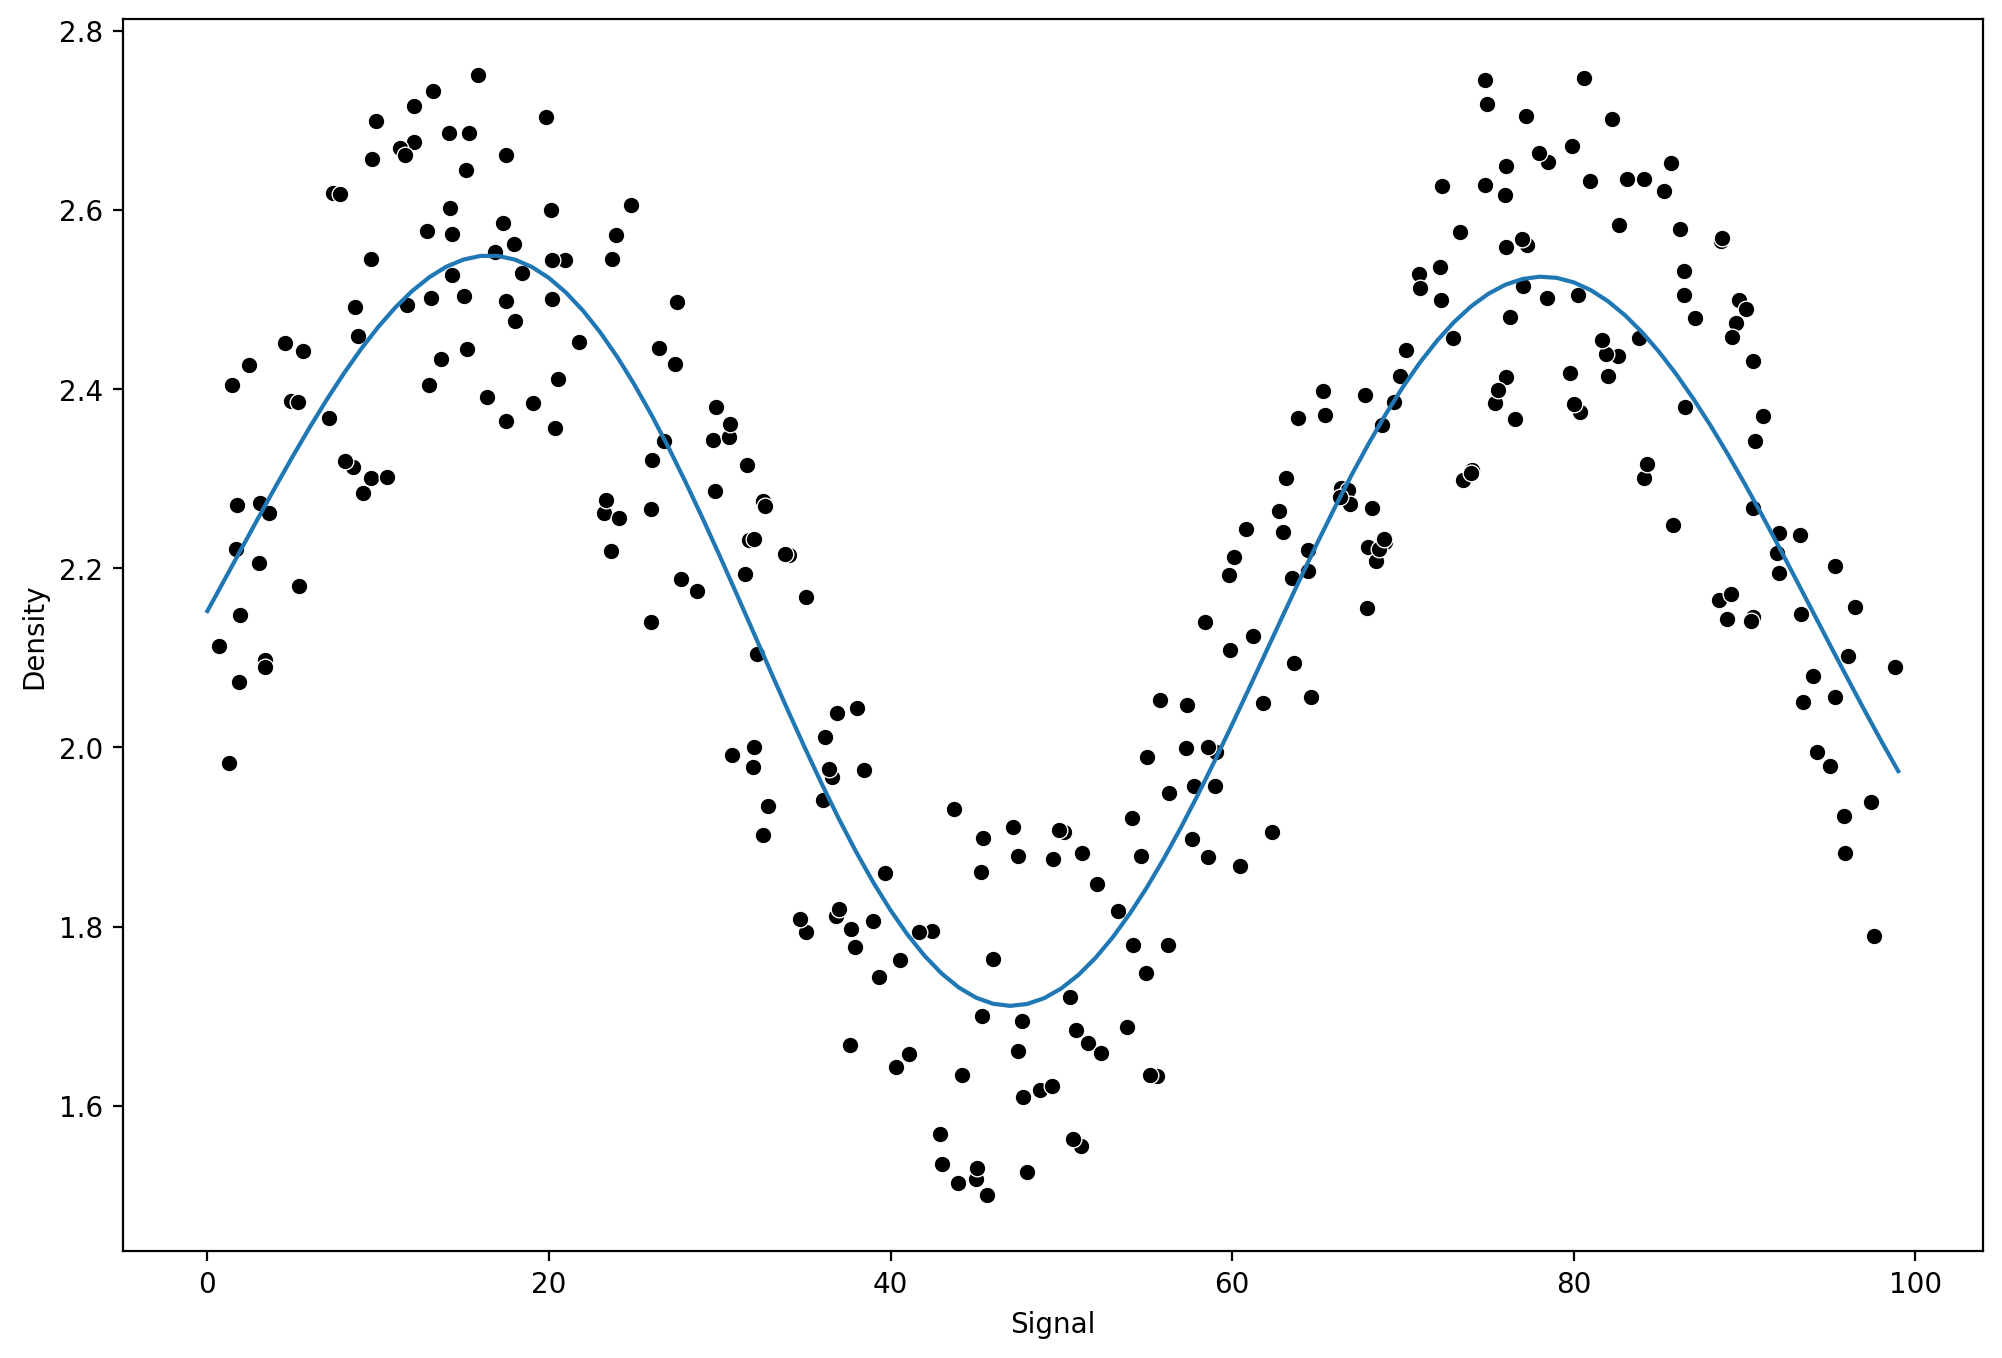

In [78]:
svr = SVR()
param_grid = {"C": [0.01, 0.1, 1, 5, 10, 100, 1000], "gamma": ["auto", "scale"]}

grid = GridSearchCV(svr, param_grid)
run_model(grid, X_train, X_test, y_train, y_test)

MAE: 0.11861165085793123
RMSE: 0.14503748183011064


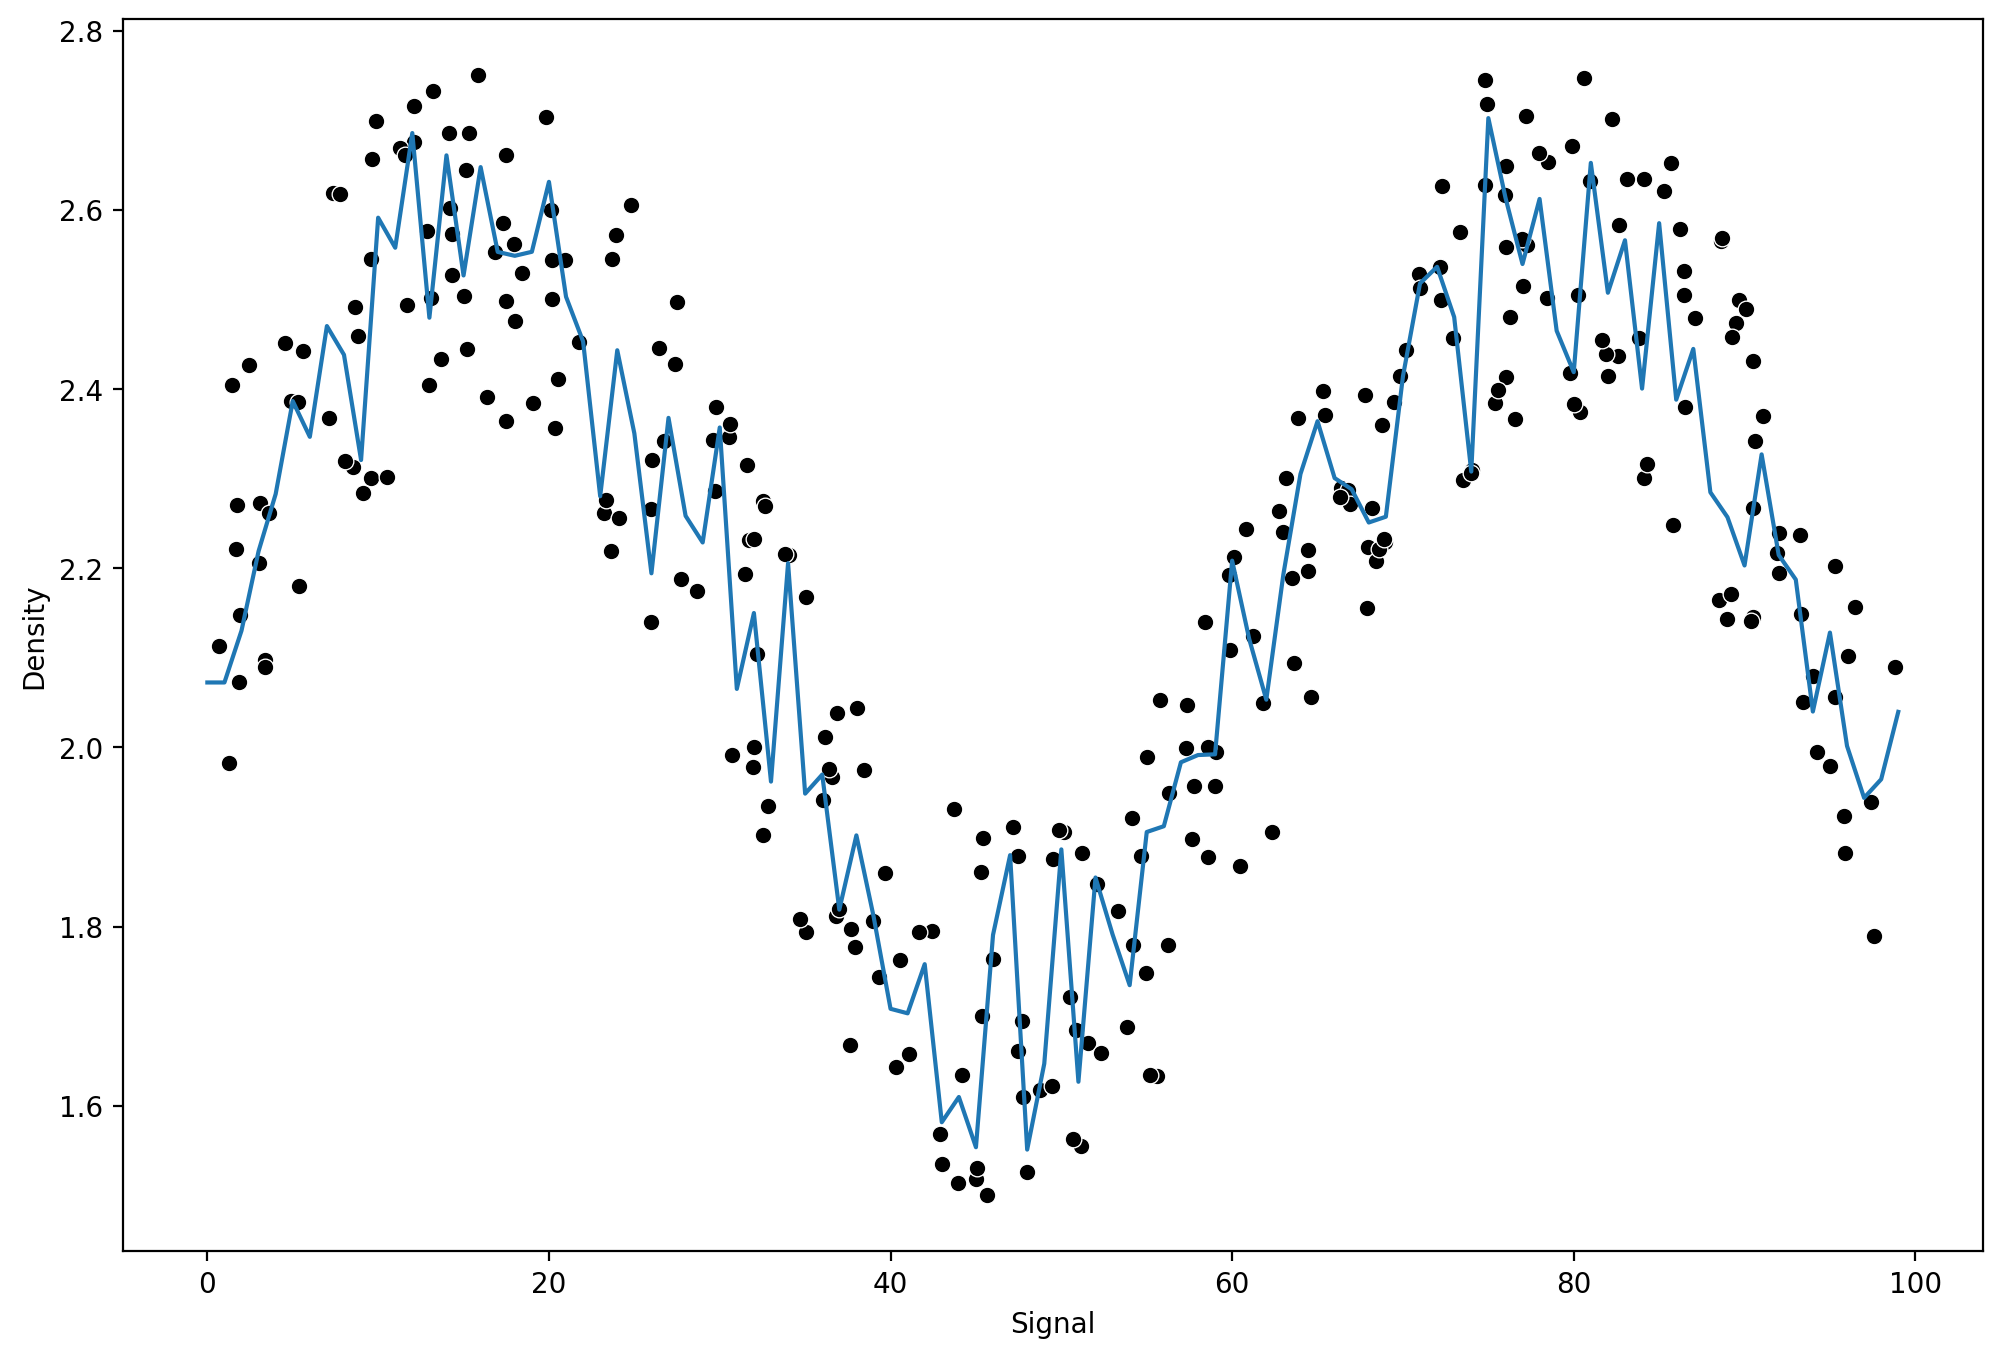

In [79]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, X_train, X_test, y_train, y_test)

MAE: 0.12703399592995443
RMSE: 0.14536433248271918


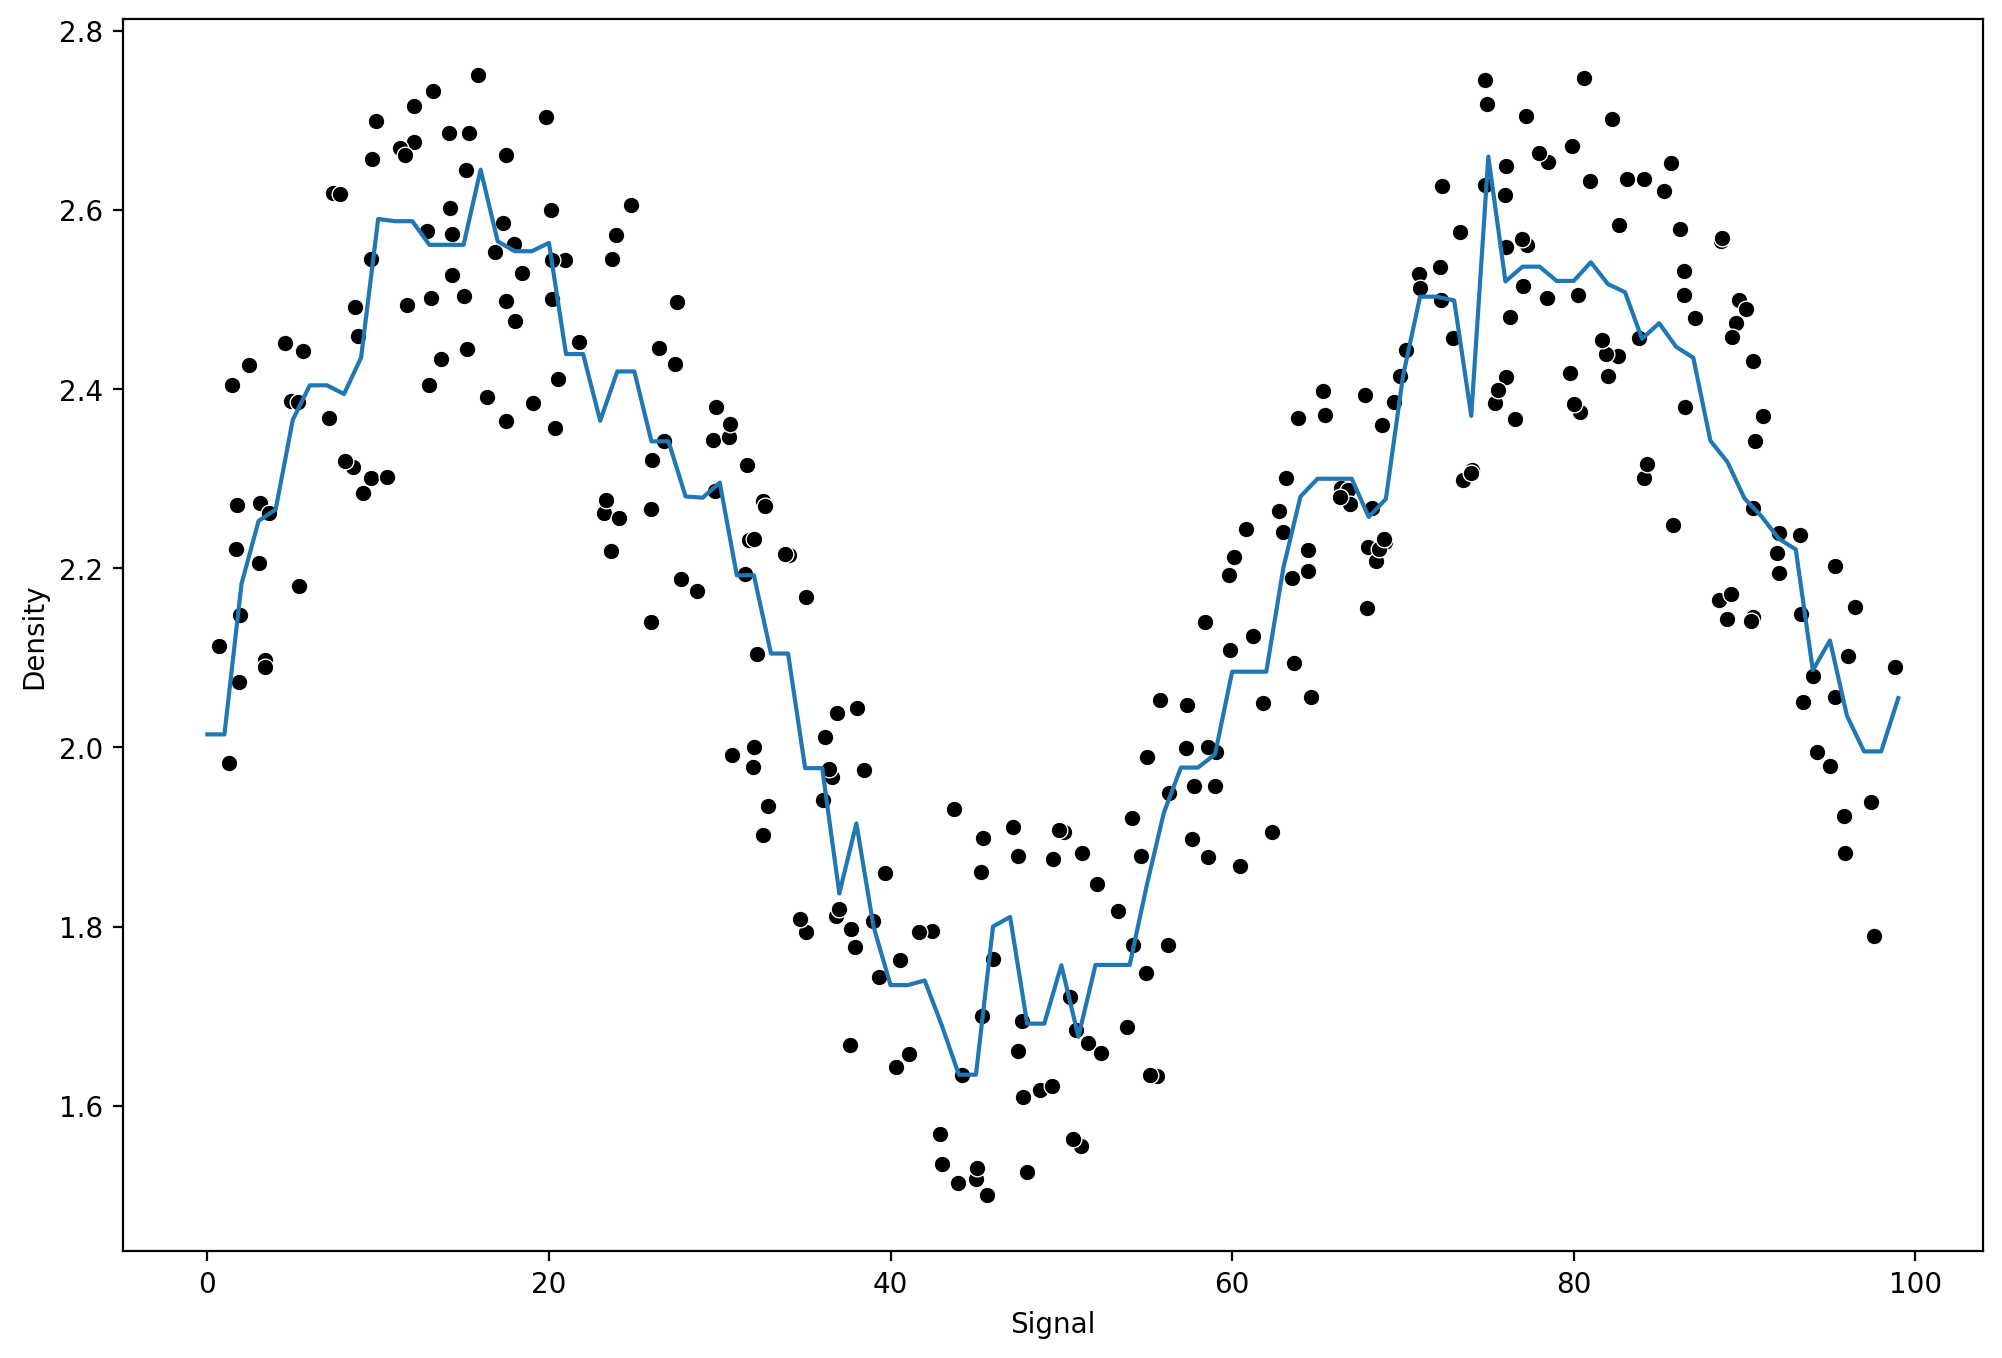

In [80]:
model = GradientBoostingRegressor()
run_model(model, X_train, X_test, y_train, y_test)

MAE: 0.13216140309834906
RMSE: 0.14826351516604436


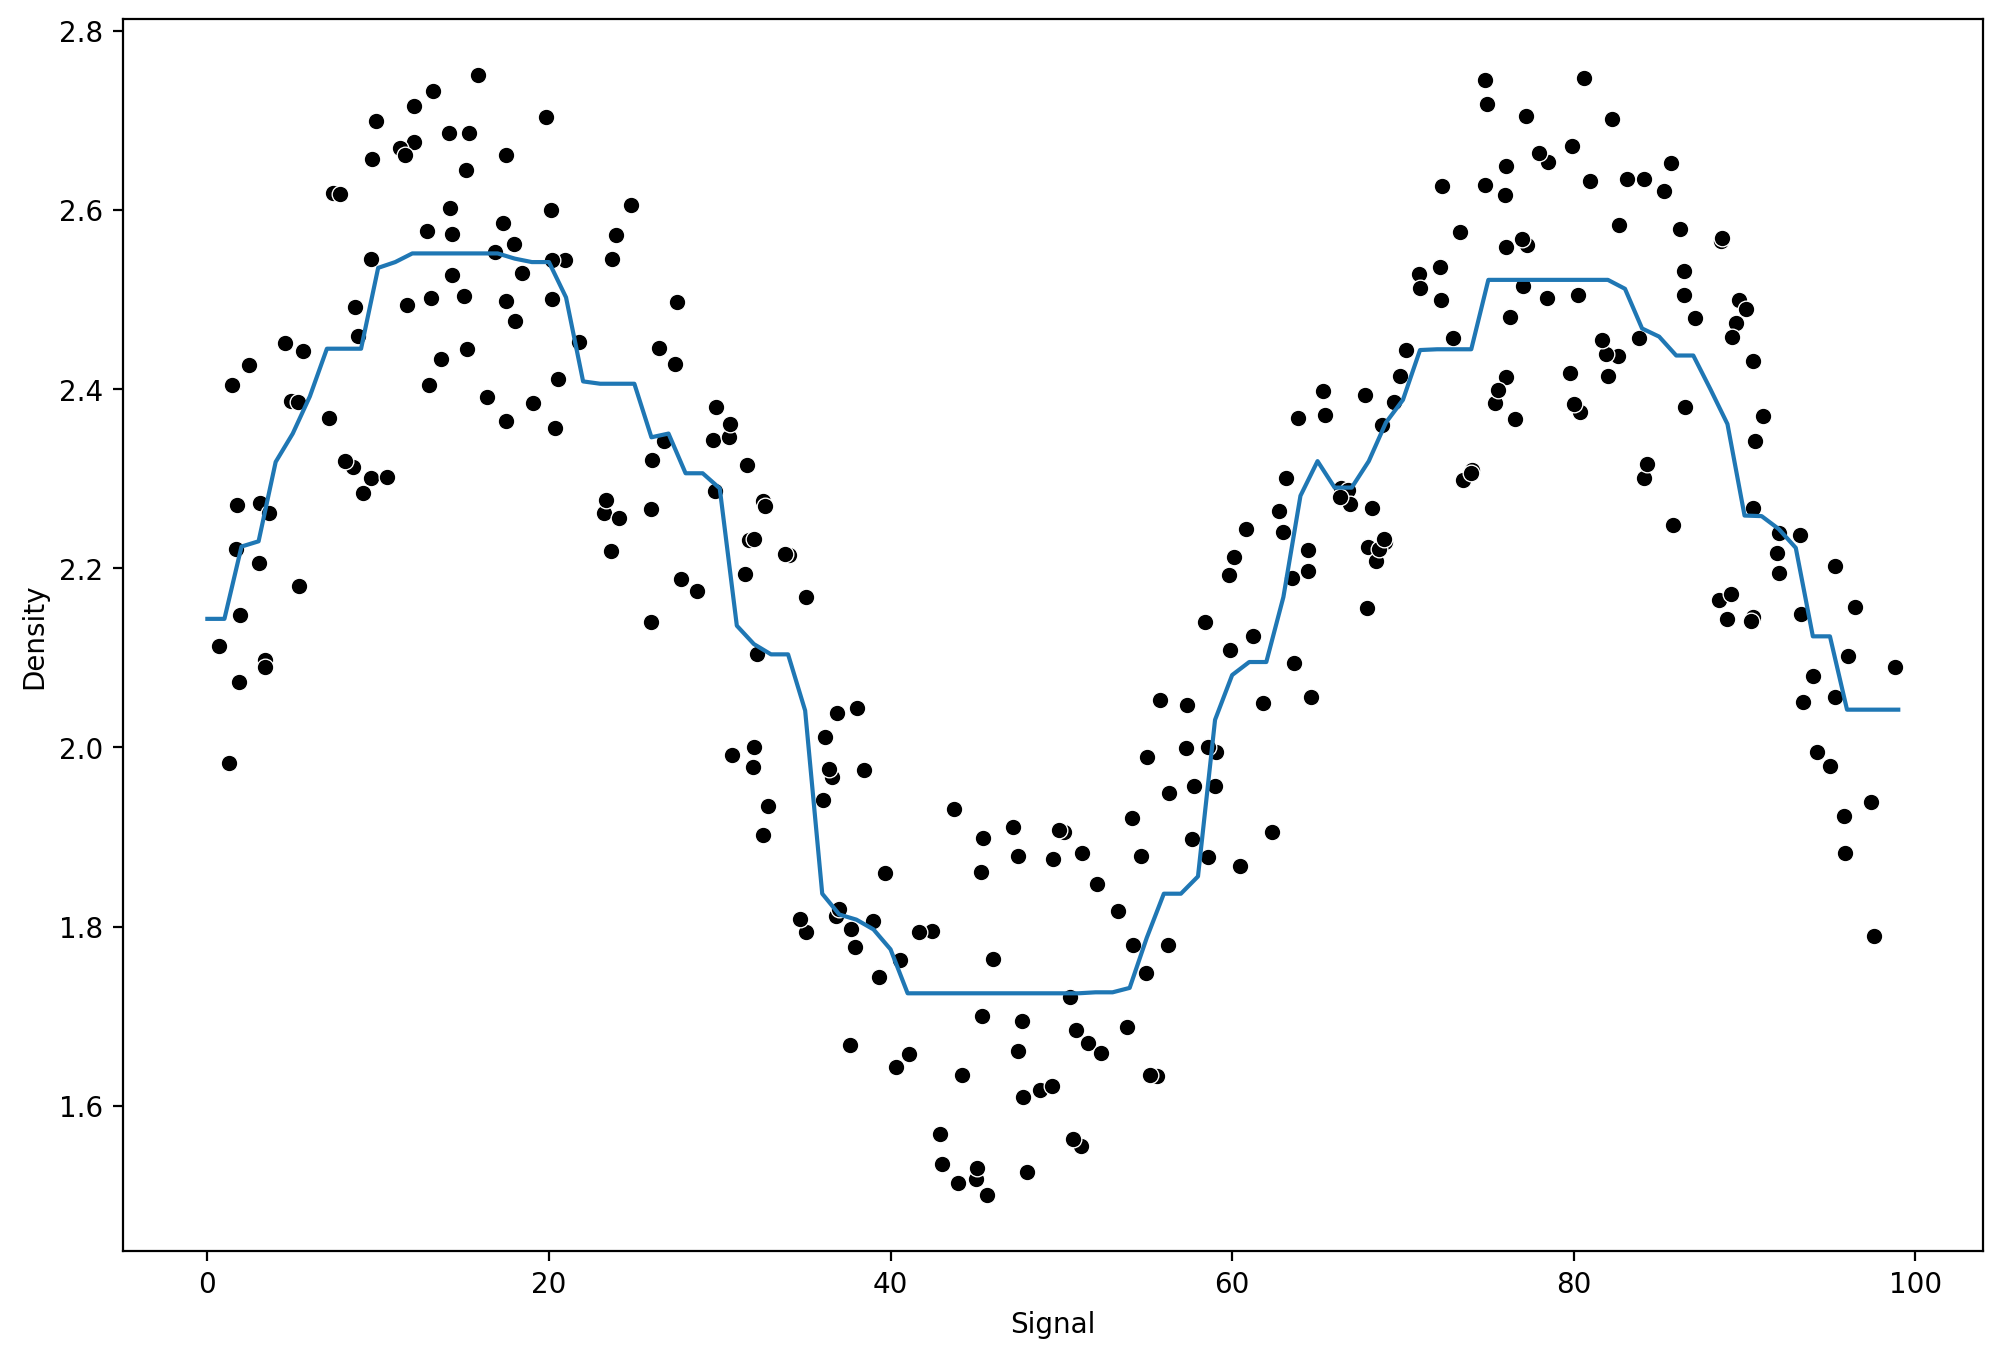

In [81]:
model = AdaBoostRegressor()
run_model(model, X_train, X_test, y_train, y_test)